# Autoregressive Integrated Moving Average (ARIMA) Models

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math


# Load the input files
eastmank_revenue = pd.read_excel("./Data/EASTMANK.XLS", sheet_name = "Data")[["Year", "Real Revenue"]]
eastmank_revenue = eastmank_revenue.rename(columns = {"Real Revenue":"Real_Revenue"})
eastmank_revenue.head()

,Year,Real_Revenue
0,1975,9.3
1,1976,9.5
2,1977,9.9
3,1978,10.7
4,1979,11.0


In [61]:
# Create coded year ariable
eastmank_revenue["coded_year"] = eastmank_revenue.index
eastmank_revenue.head()

,Year,Real_Revenue,coded_year
0,1975,9.3,0
1,1976,9.5,1
2,1977,9.9,2
3,1978,10.7,3
4,1979,11.0,4


# 3rd Order Autoregressive Model

In [62]:
from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(eastmank_revenue['Real_Revenue'], order = (3,0,0)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Real_Revenue   No. Observations:                   25
Model:                     ARMA(3, 0)   Log Likelihood                 -34.633
Method:                       css-mle   S.D. of innovations              0.935
Date:                Tue, 17 Nov 2020   AIC                             79.267
Time:                        15:10:40   BIC                             85.361
Sample:                             0   HQIC                            80.957
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.8375      0.792     13.676      0.000       9.284      12.391
ar.L1.Real_Revenue     1.2379      0.195      6.340      0.000       0.855       1.621
ar.L2.Real_Revenue    -0.5155      0.300     -1.716      0.086      -1.104       0.073
ar.L3.Real_Revenue     0.0418      0.202      0.207      0.836      -0.353       0.437
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4295           -0.6937j            1.5889           -0.0719
AR.2            1.4295           +0.6937j            1.5889            0.0719
AR.3            9.4833           -0.0000j            9.4833           -0.0000
-----------------------------------------------------------------------------
"""

# 2nd Order Autoregressive Model

In [63]:
arima_model = ARIMA(eastmank_revenue['Real_Revenue'], order = (2,0,0)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Real_Revenue   No. Observations:                   25
Model:                     ARMA(2, 0)   Log Likelihood                 -34.655
Method:                       css-mle   S.D. of innovations              0.936
Date:                Tue, 17 Nov 2020   AIC                             77.310
Time:                        15:10:41   BIC                             82.185
Sample:                             0   HQIC                            78.662
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.8651      0.750     14.484      0.000       9.395      12.335
ar.L1.Real_Revenue     1.2180      0.170      7.166      0.000       0.885       1.551
ar.L2.Real_Revenue    -0.4654      0.179     -2.603      0.009      -0.816      -0.115
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3084           -0.6607j            1.4658           -0.0744
AR.2            1.3084           +0.6607j            1.4658            0.0744
-----------------------------------------------------------------------------
"""

# Forecast the revenue for the year 2000 and 2001

In [67]:
forecast = pd.DataFrame(arima_model.predict(start = 25, end = 26), columns = ['Real_Revenue_Forecast'])
forecast['coded_year'] = forecast.index
forecast['Year'] = range(2000,2002)
forecast

,Real_Revenue_Forecast,coded_year,Year
25,9.224899,25,2000
26,9.968182,26,2001


In [68]:
eastmank_revenue = pd.merge(eastmank_revenue,forecast, how = 'outer')
eastmank_revenue = eastmank_revenue.drop('coded_year', axis = 1)
eastmank_revenue

,Year,Real_Revenue,Real_Revenue_Forecast
0,1975,9.3,NaN
1,1976,9.5,NaN
2,1977,9.9,NaN
3,1978,10.7,NaN
4,1979,11.0,NaN
5,1980,11.8,NaN
6,1981,11.3,NaN
7,1982,11.2,NaN
8,1983,10.2,NaN
9,1984,10.2,NaN


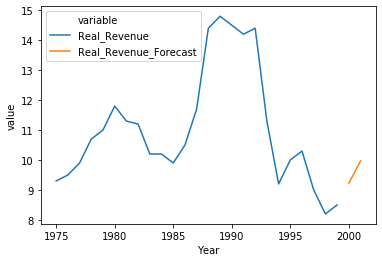

In [69]:
sns.lineplot(x = 'Year', y = 'value', hue='variable', 
             data=pd.melt(eastmank_revenue, ['Year']))